## Predictive Maintenance for Manufacturing Machines

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, precision_recall_curve, auc
)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


### Load Dataset

In [3]:
df = pd.read_csv("ai4i2020.csv")
print(df.head())
print(df.info())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Preprocessing

In [9]:
# Drop ID-like columns
df = df.drop(["UDI", "Product ID"], axis=1)

# One-hot encode 'Type' (L, M, H)
df = pd.get_dummies(df, columns=["Type"], drop_first=True)

# Target 1: Binary classification (failure soon = yes/no)
y_failure = df["Machine failure"]

# Target 2: Multi-class classification (failure type)
failure_types = ["TWF", "HDF", "PWF", "OSF", "RNF"]
y_failure_type = df[failure_types].idxmax(axis=1)

# Drop targets from features
X = df.drop(["Machine failure"] + failure_types, axis=1)

# Encode failure type labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_failure_type_encoded = le.fit_transform(y_failure_type)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(
    X, y_failure, y_failure_type_encoded, test_size=0.2, random_state=42
)

# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train Models & Evaluate

=== Model 1: Failure Prediction (Binary) ===

Random Forest:
 Accuracy: 0.9845
 Precision: 0.8750
 Recall: 0.5738
 F1-score: 0.6931

Gradient Boosting:
 Accuracy: 0.9840
 Precision: 0.8372
 Recall: 0.5902
 F1-score: 0.6923

Logistic Regression:
 Accuracy: 0.9735
 Precision: 0.6667
 Recall: 0.2623
 F1-score: 0.3765

=== Model 2: Failure Type Classification (Multi-class) ===

Decision Tree:
              precision    recall  f1-score   support

         HDF       0.87      0.76      0.81        17
         OSF       0.47      0.69      0.56        13
         PWF       0.71      0.83      0.77        18
         RNF       0.00      0.00      0.00         6
         TWF       0.99      0.99      0.99      1946

    accuracy                           0.98      2000
   macro avg       0.61      0.66      0.63      2000
weighted avg       0.98      0.98      0.98      2000



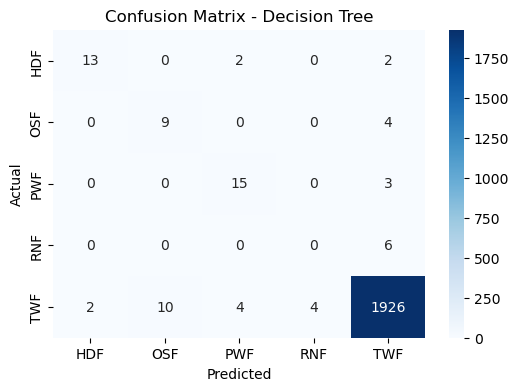


SVM:
              precision    recall  f1-score   support

         HDF       0.00      0.00      0.00        17
         OSF       0.62      0.38      0.48        13
         PWF       0.89      0.44      0.59        18
         RNF       0.00      0.00      0.00         6
         TWF       0.98      1.00      0.99      1946

    accuracy                           0.98      2000
   macro avg       0.50      0.37      0.41      2000
weighted avg       0.97      0.98      0.97      2000



C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


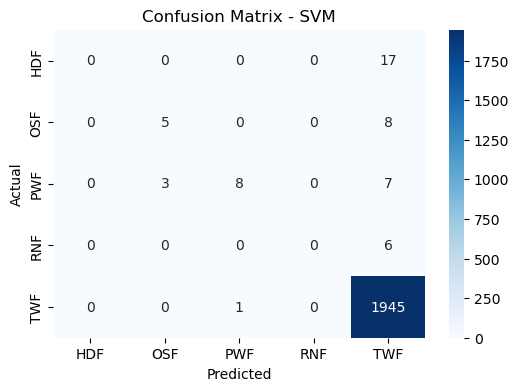


Naive Bayes:
              precision    recall  f1-score   support

         HDF       0.34      0.65      0.45        17
         OSF       0.30      0.85      0.44        13
         PWF       0.21      0.33      0.26        18
         RNF       0.00      0.00      0.00         6
         TWF       0.99      0.97      0.98      1946

    accuracy                           0.95      2000
   macro avg       0.37      0.56      0.42      2000
weighted avg       0.97      0.95      0.96      2000



C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


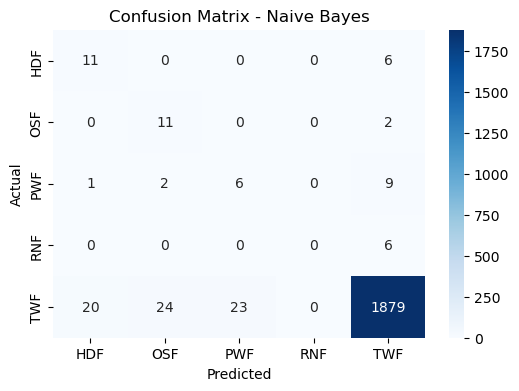

C:\Users\bbuser\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost:
              precision    recall  f1-score   support

         HDF       0.94      0.94      0.94        17
         OSF       0.77      0.77      0.77        13
         PWF       0.76      0.72      0.74        18
         RNF       0.00      0.00      0.00         6
         TWF       0.99      1.00      1.00      1946

    accuracy                           0.99      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.99      0.99      0.99      2000



C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


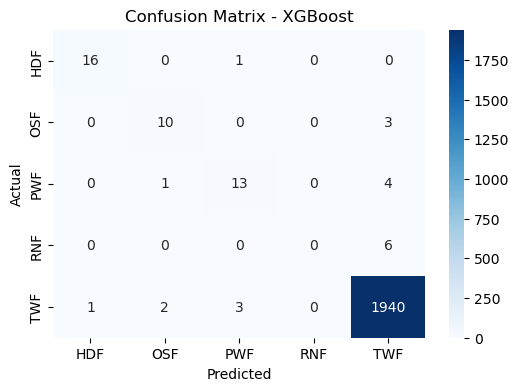

In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Model 1: Failure Prediction
# -----------------------------
print("=== Model 1: Failure Prediction (Binary) ===")

models_failure = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42)
}

for name, model in models_failure.items():
    model.fit(X_train, y1_train)
    preds = model.predict(X_test)

    precision, recall, f1, _ = precision_recall_fscore_support(y1_test, preds, average="binary")
    acc = accuracy_score(y1_test, preds)

    print(f"\n{name}:")
    print(f" Accuracy: {acc:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall: {recall:.4f}")
    print(f" F1-score: {f1:.4f}")

# -----------------------------
# Model 2: Failure Type Classification
# -----------------------------
print("\n=== Model 2: Failure Type Classification (Multi-class) ===")

models_failure_type = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel="rbf", random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

for name, model in models_failure_type.items():
    model.fit(X_train, y2_train)
    preds = model.predict(X_test)

    print(f"\n{name}:")
    print(classification_report(y2_test, preds, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y2_test, preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## Task Is Done !